In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import noisereduce as nr

import librosa.display
import IPython.display as ipd
import pandas as pd
import os
import math
import sklearn

import AnimalDetect as ad


d:\Data_Science\Audio_processing\Animal\audio_analysis\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Path to the directory containing audio files
audio_dir = 'esc50-dataset/dataset'

# Path to the metadata CSV file
metadata_file = 'esc50-dataset/esc50.csv'

# Load metadata into a Pandas dataframe
metadata = pd.read_csv(metadata_file)

# Filter metadata to include only needed label
dog_metadata = metadata[metadata['category'] == 'crow']

# Get list of audio filenames for filtered metadata
dog_files = dog_metadata['filename'].tolist()

# Construct list of full paths to audio files
dog_paths = [os.path.join(audio_dir, f) for f in dog_files]

In [3]:
sourse, sr = librosa.load(dog_paths[23])

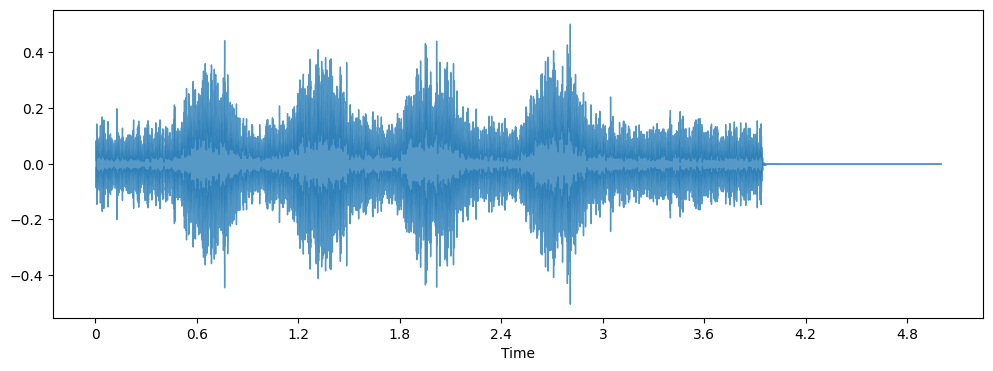

In [4]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(sourse, sr=sr, alpha=0.75)
plt.show()

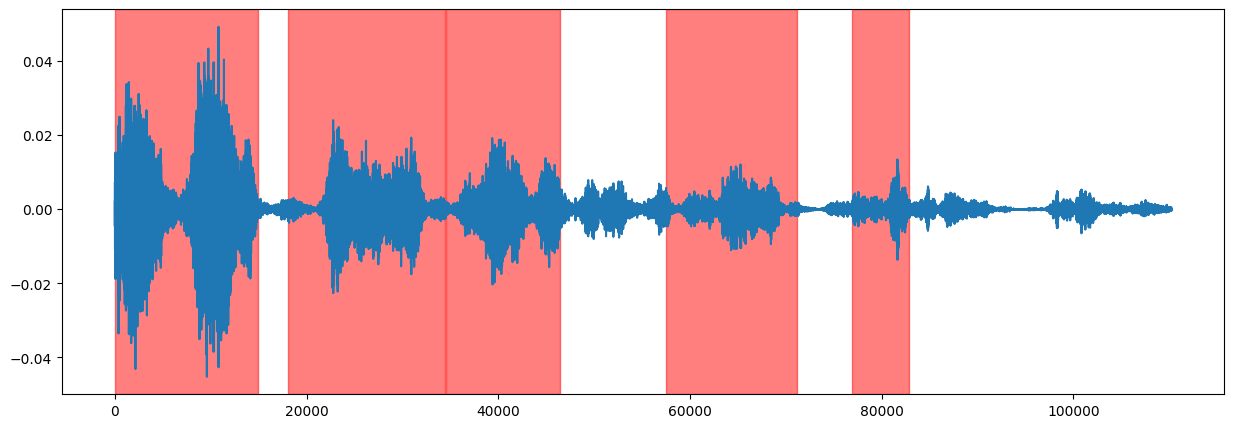

Start Sample Point:  [0, 18048, 34589, 57472, 76928]
End Sample Point:  [14976, 34461, 46464, 71168, 82816]


In [5]:
x, sr = librosa.load(dog_paths[36])
reduced_noise = nr.reduce_noise(y=x, sr=sr)
start_time, end_time, clips = ad.onset_detection(reduced_noise, False, False, 2048, 128, 20, 10)
sourse = reduced_noise

In [6]:
sourse = clips[1]

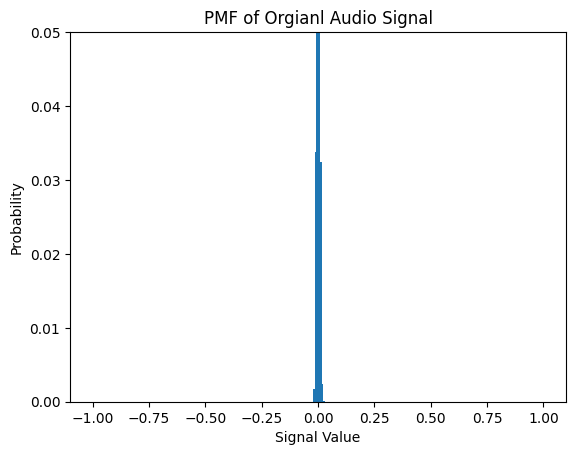

In [7]:
hist, bins = np.histogram(sourse, bins=256, range=(-1, 1))
pmf = hist / len(sourse)

plt.bar(bins[:-1], pmf, align='edge', width=1/128)
plt.ylim(0, 0.05)
plt.xlabel('Signal Value')
plt.ylabel('Probability')
plt.title('PMF of Orgianl Audio Signal')
plt.show()

In [8]:
# Compute the mean and standard deviation of the signal
mean = np.mean(sourse)
std = np.std(sourse)

# Print the mean and standard deviation
print('Mean:', mean)
print('Standard deviation:', std)

Mean: -1.2116541e-06
Standard deviation: 0.004012818


In [9]:
FRAME_SIZE = 1

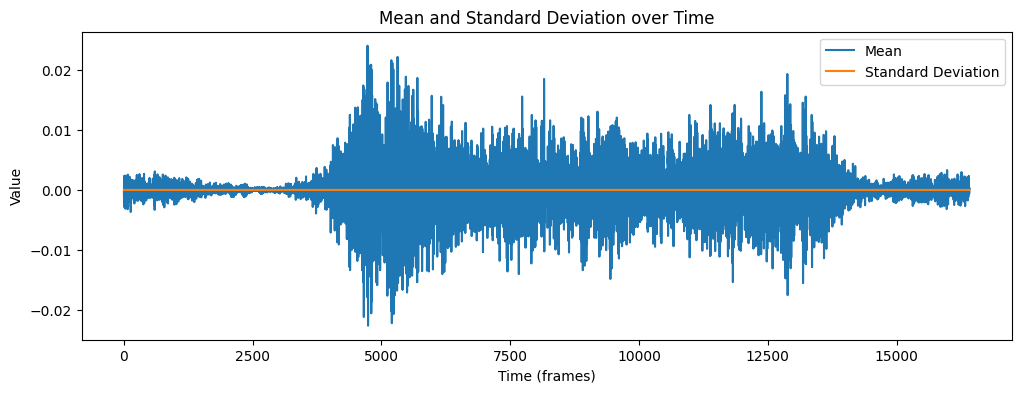

In [10]:
# Compute the mean and standard deviation for each frame
means = [np.mean(sourse[i:i+FRAME_SIZE]) for i in range(0, len(sourse), FRAME_SIZE)]
stds = [np.std(sourse[i:i+FRAME_SIZE]) for i in range(0, len(sourse), FRAME_SIZE)]

# Plot the mean and standard deviation over time
plt.figure(figsize=(12, 4))
plt.plot(means)
plt.plot(stds)
plt.legend(['Mean', 'Standard Deviation'])
plt.xlabel('Time (frames)')
plt.ylabel('Value')
plt.title('Mean and Standard Deviation over Time')
plt.show()

In [20]:
UCL = 1.04*std/np.sqrt(FRAME_SIZE)
LCL = -1.04*std/np.sqrt(FRAME_SIZE)
print('UCL:', UCL)
print('LCL:', LCL)

UCL: 0.004173330701887607
LCL: -0.004173330701887607


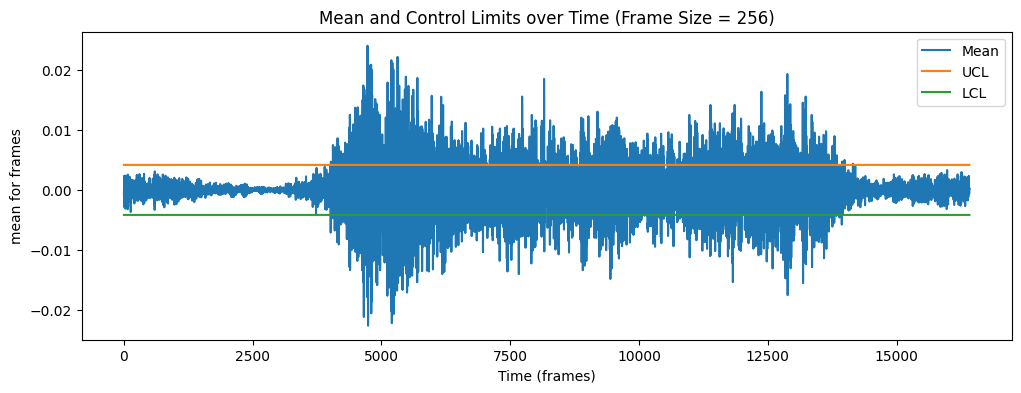

In [21]:
# Plot the moving means and the control limits
plt.figure(figsize=(12, 4))
plt.plot(means)
plt.plot([UCL]*len(means))
plt.plot([LCL]*len(means))
plt.legend(['Mean', 'UCL', 'LCL'])
plt.xlabel('Time (frames)')
plt.ylabel('mean for frames')
plt.title('Mean and Control Limits over Time (Frame Size = 256)')
plt.show()

In [25]:
onset = np.where(np.abs(means) >= UCL)

In [26]:
onset_time = [i*FRAME_SIZE for i in onset[0]]

In [27]:
start = onset[0][0]*FRAME_SIZE
end = onset[0][-1]*FRAME_SIZE

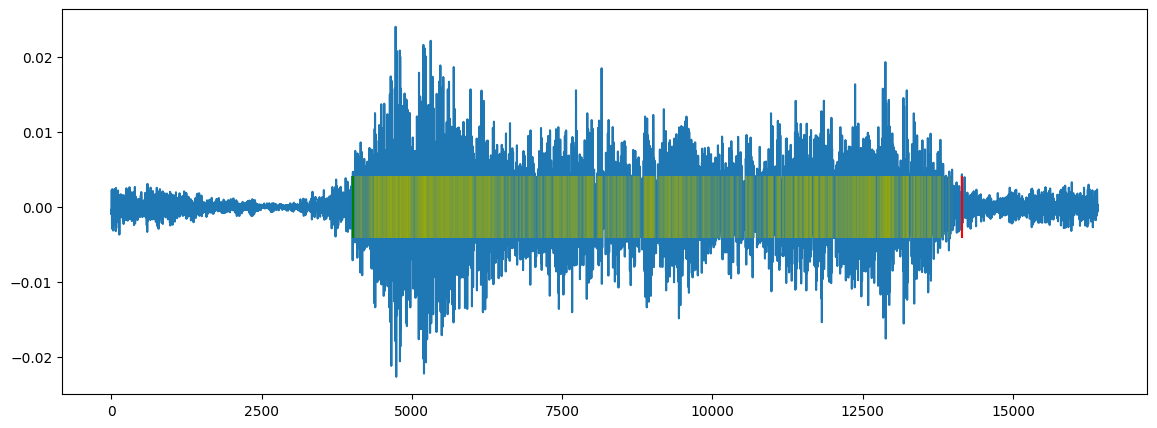

In [32]:
#plot the change of moving average
plt.figure(figsize=(14, 5))
plt.plot(sourse)


#plot the change points
plt.vlines(onset_time, np.max(signal), np.min(signal), color='y', alpha=0.05)
plt.vlines(start, np.max(signal), np.min(signal), color='g')
plt.vlines(end, np.max(signal), np.min(signal), color='r')
plt.show()